# Ch02 - Financial Data: Stylized Facts

#### Packages
The following packages are used in the example:

In [98]:
# Core data handling
import yfinance as yf
import numpy as np
import pandas as pd

# Book data (pip install "git+https://github.com/dppalomar/pob.git#subdirectory=python")
from pob_python import SP500_stocks_2015to2020, cryptos_2017to2021_daily

# Statistical analysis
from scipy.stats import norm, skew, kurtosis 
import arch

# Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#plt.style.use('seaborn-v0_8') 
import seaborn as sns
sns.set_theme(style='darkgrid')
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### 2.1 Sytlized Facts (Palomar(2025))
* *Lack of stationarity*: The statistic of financial time series change over time(past returns do not necessarily reflect future performance)
* *Volatility clustering*: Large price changes tend to be followed by large price changes(ignoring the sign), wheraes small price changes tend to followed by small price changes.
* *Heavy tails*: Gaussian distributions generally do not hold in financial data; instead, distributions typically exhibit so-called heavy tails.
* *Positive correlation of assets*: Returns are often positively correlated since assets typically move together with the market.


### 2.2 Prices and returns 

##### 1) Download data for S&P 500 and Bitcoin

In [82]:
# S&P 500 data
sp500 = yf.download('^GSPC', period='20y', auto_adjust=True)
sp500_prices = sp500['Close']

# Bitcoin data
btc = yf.download('BTC-USD', period='5y', auto_adjust=True)
btc_prices = btc['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


##### 2) Plot  price over time:

In [134]:
def plot_log_price_over_time(prices,label='Ticker',ax=None):
    """
    Plot the log of a price series over time, with automatic labels and grid.
    
    """
    ticker = prices.columns[0] if prices.columns[0] else ' '
    start_date = prices.index.min().strftime('%Y-%m-%d')
    end_date = prices.index.max().strftime('%Y-%m-%d')

    if ax is None:
        fig, ax = plt.subplots(figsize=(12,6))

    np.log(prices).plot(ax=ax, label=label)
    ax.set_title(f"{label} ({ticker}) log price over time ({start_date} to {end_date})")
    ax.set_ylabel('Log Price')
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    plt.setp(ax.get_xticklabels(), rotation=45)
    ax.grid(which='major', linestyle='-', linewidth=0.75)
    ax.grid(which='minor', linestyle=':', linewidth=0.5, color='gray')
    plt.tight_layout()
    return ax

<Axes: title={'center': 'Ticker (^GSPC) log price over time (2005-06-10 to 2025-06-09)'}, xlabel='Date', ylabel='Log Price'>

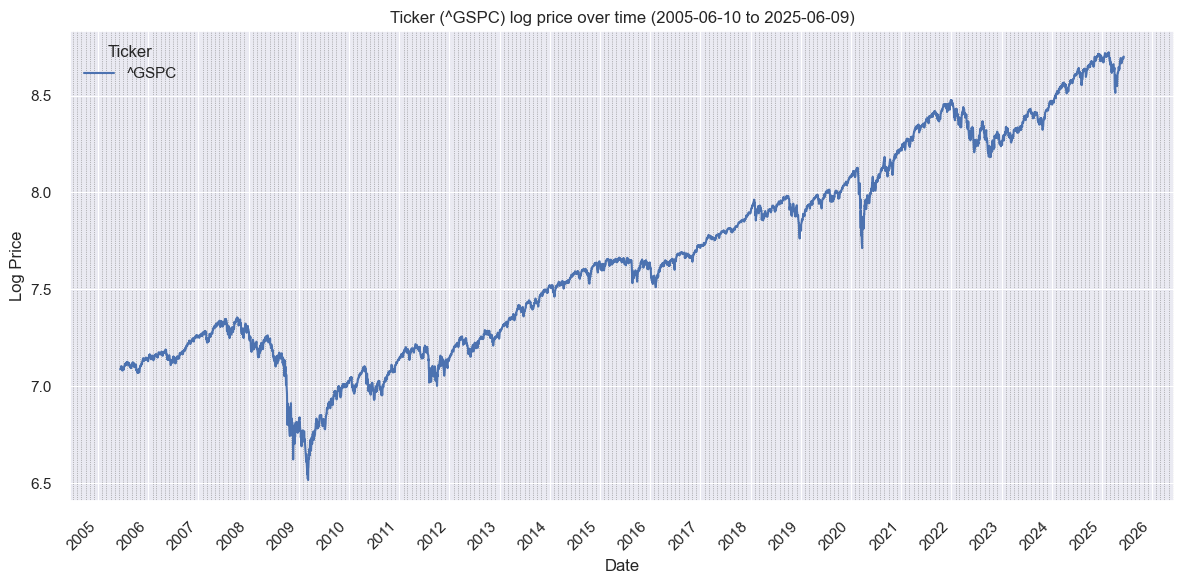

In [135]:
plot_log_price_over_time(sp500_prices)

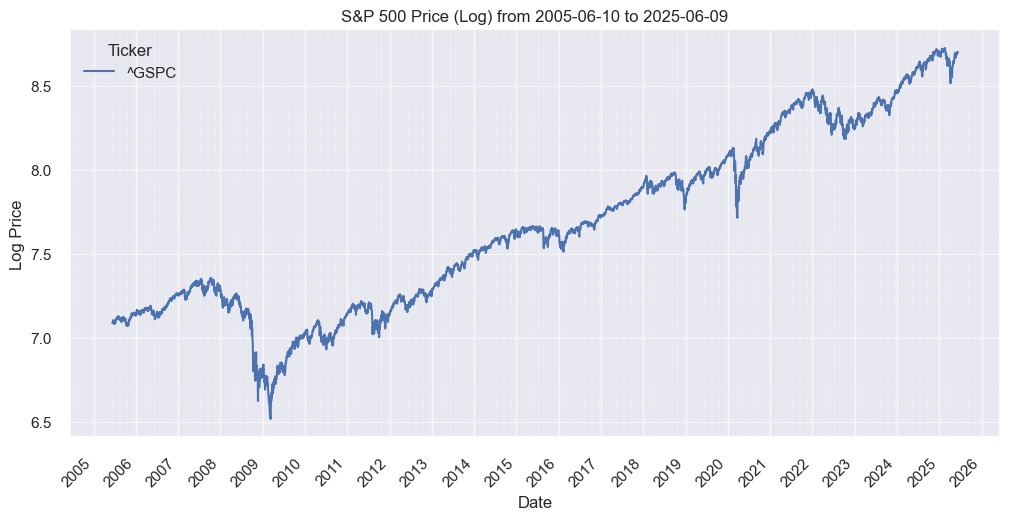

In [129]:
# Get start and end dates as strings
start_date = sp500_prices.index.min().strftime('%Y-%m-%d')
end_date = sp500_prices.index.max().strftime('%Y-%m-%d')

fig, ax = plt.subplots(figsize=(12,6))
np.log(sp500_prices).plot(ax=ax)
ax.set_title(f"S&P 500 Price (Log) from {start_date} to {end_date}")

# X and Y axis formatting
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
plt.setp(ax.get_xticklabels(), rotation=45)
ax.set_ylabel('Log Price')

ax.grid(which='major', linestyle='-', linewidth=0.5)
ax.grid(which='minor', linestyle=':', linewidth=0.1, color='gray')

plt.show()

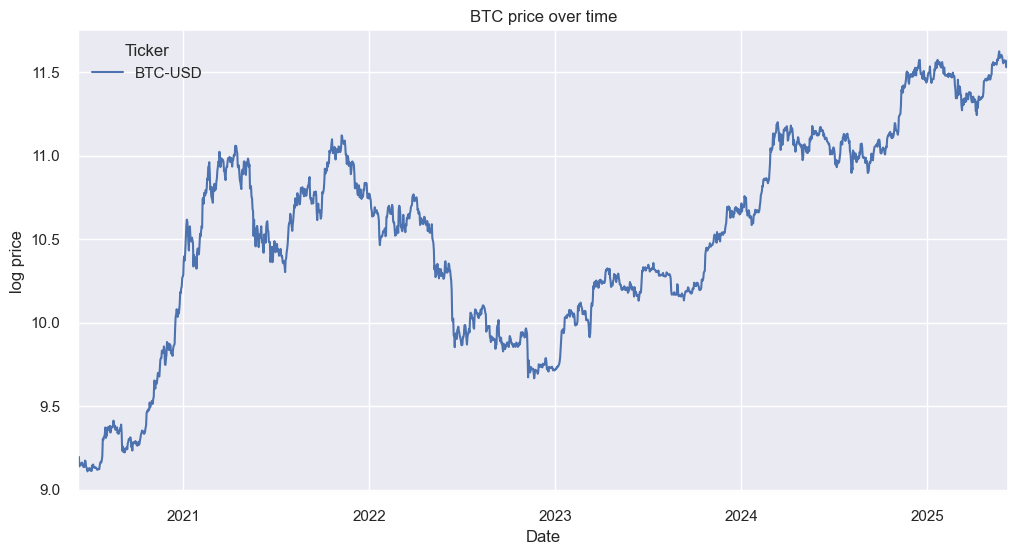

In [89]:
fig, ax = plt.subplots(figsize=(12,6))
np.log(btc_prices).plot(ax=ax)
ax.set_title('BTC price over time')
ax.set_ylabel('log price');